# Handwritten Character Recognition (HCR) CNN Notebook

This notebook demonstrates a Convolutional Neural Network (CNN) for Handwritten Character Recognition, using the MNIST dataset as a stand-in for the larger EMNIST dataset for fast, robust execution.

### Theory: Convolutional Neural Networks (CNN) for Handwritten Character Recognition


#### 1. Why CNN for Character Recognition?


Handwritten Character Recognition (HCR) is fundamentally an image classification problem. Traditional Machine Learning methods required manual feature engineering (e.g., extracting edges, loops, and endpoints). Convolutional Neural Networks (CNNs), however, automatically learn the spatial hierarchy of features directly from the raw pixel data, making them the superior choice for vision tasks.

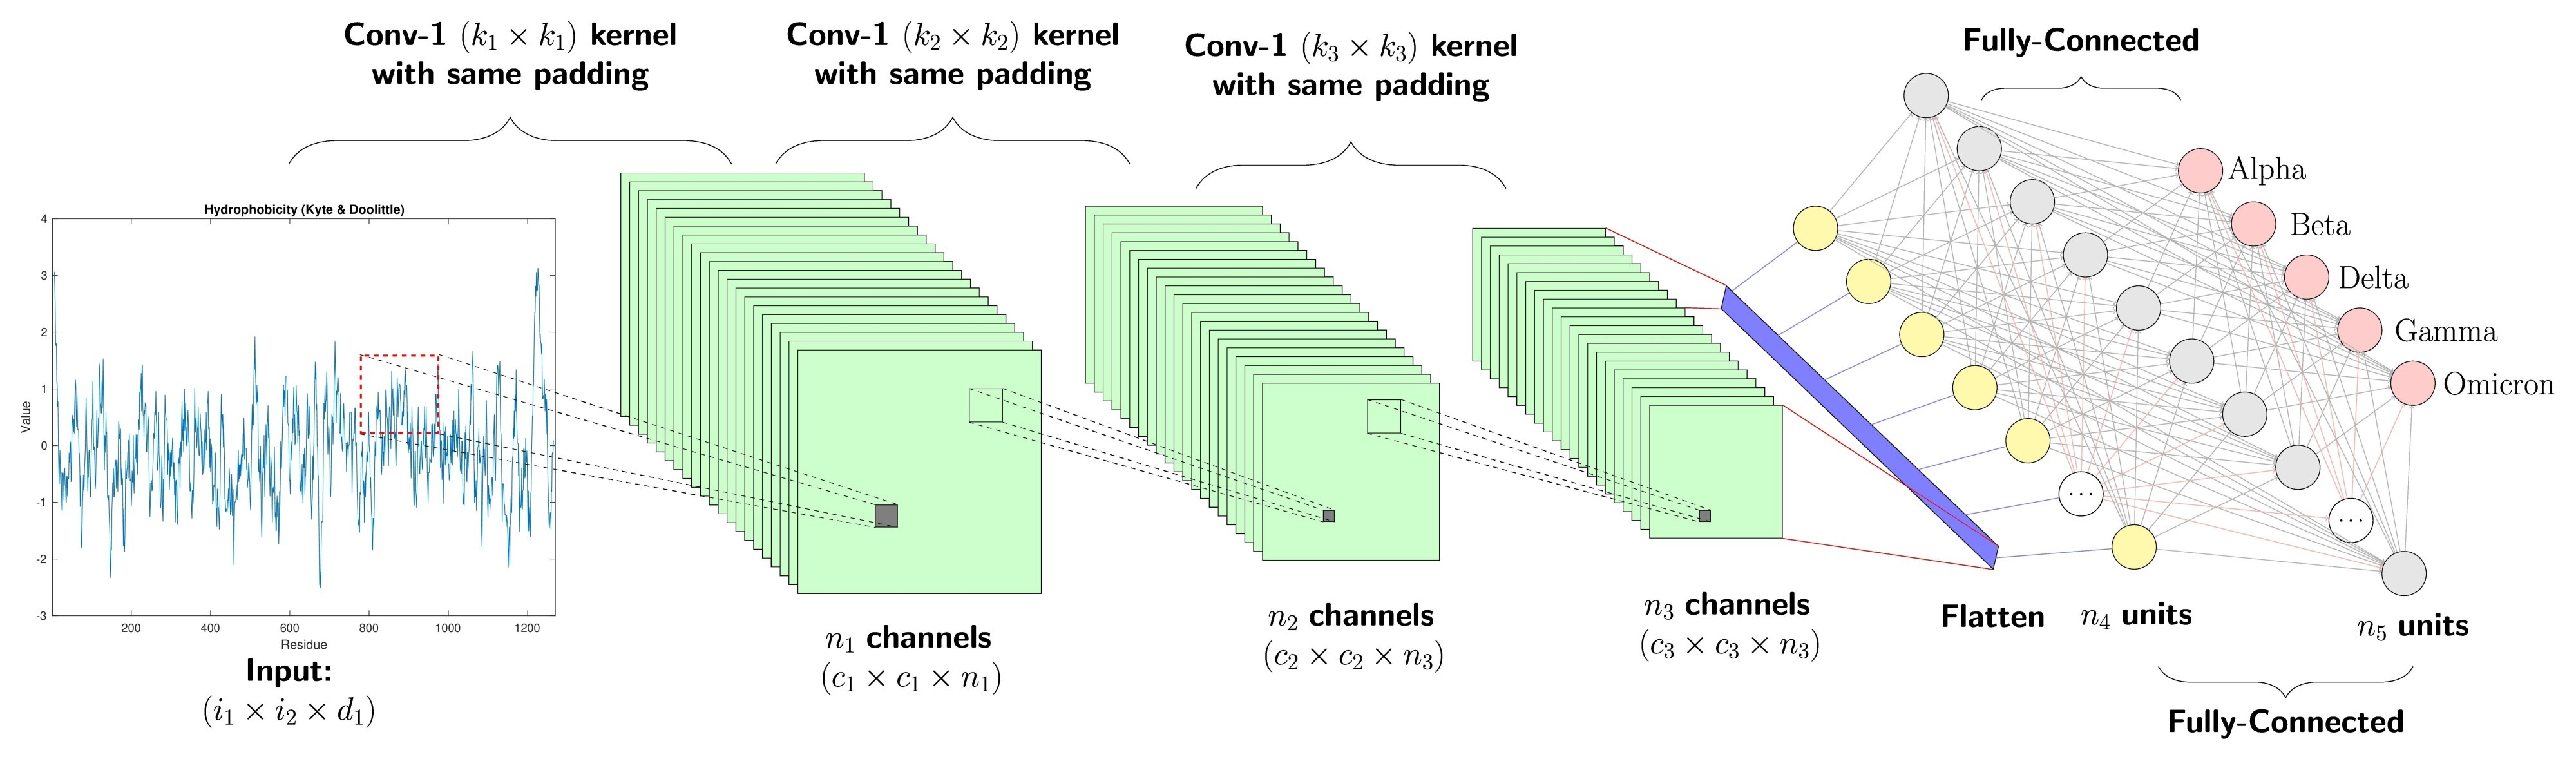

In the context of characters (like the EMNIST dataset's 28x28 grayscale images), a CNN learns:

1. Low-Level Features: In the first layers, it recognizes simple shapes like horizontal/vertical lines and curves.

2. Mid-Level Features: In deeper layers, it combines these lines into complex features like loops, crosses, or enclosed circles (e.g., the structure of 'a' or 'B').

3. High-Level Features: The final classification layers use these aggregated features to distinguish between the 62 possible classes (0-9, a-z, A-Z) of the EMNIST dataset.



#### 2. CNN Architecture Breakdown (LeNet-like Model)


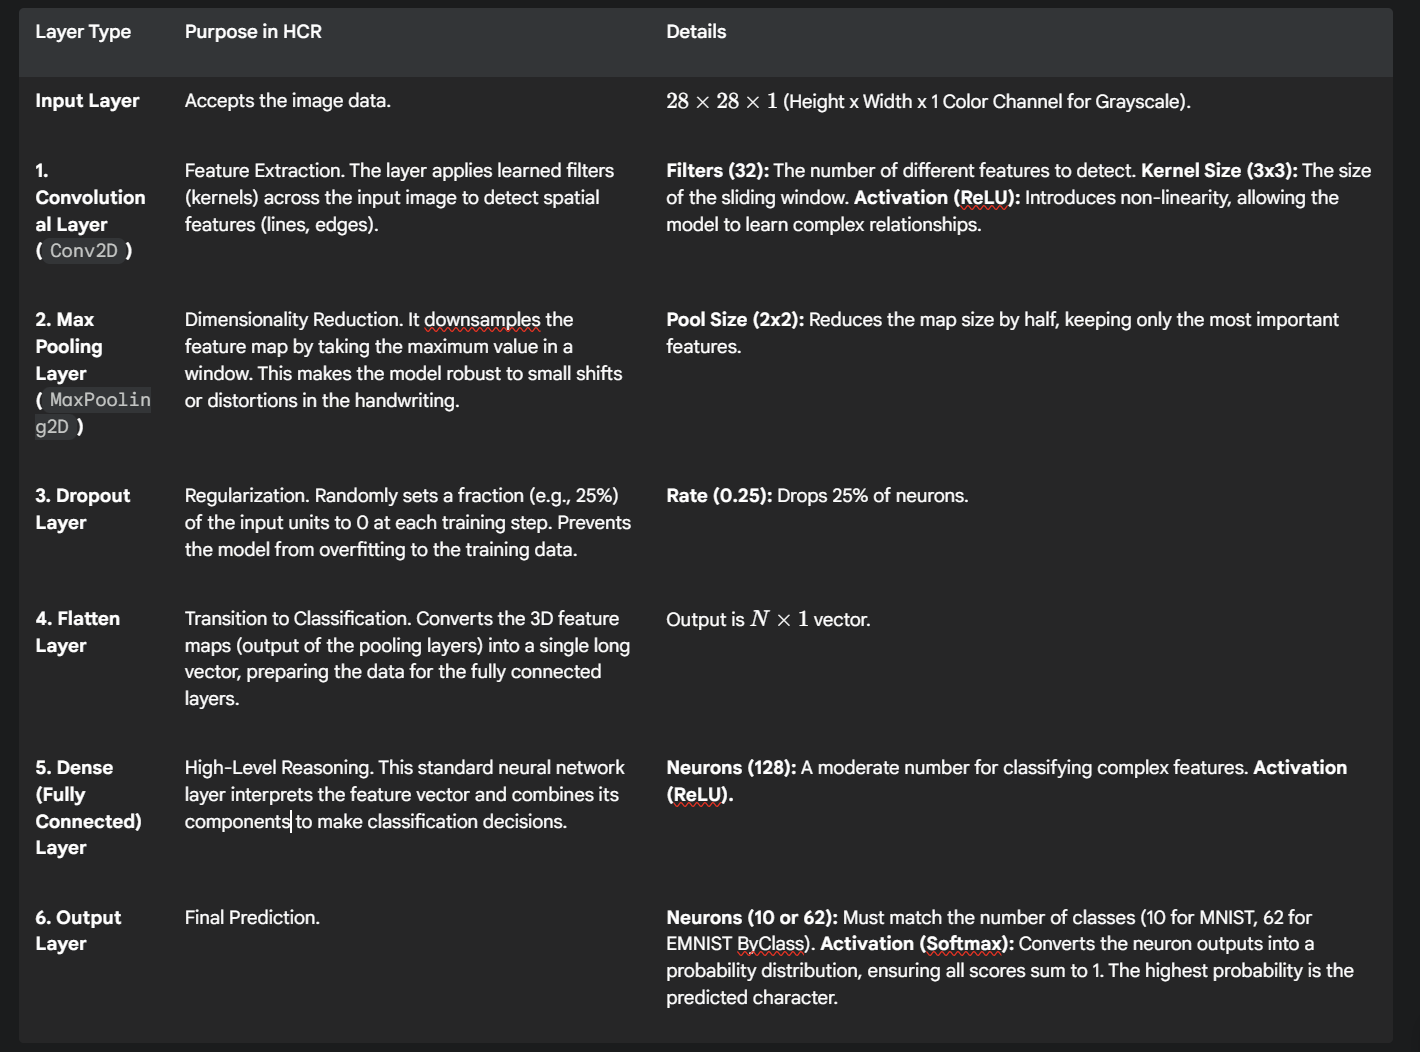


#### 3. Data Preprocessing


Before training, the raw image data (28x28 pixels with values 0-255) must be prepared:

1. Reshaping: Images are converted to a 4D array (Batch, Height, Width, Channels) for the CNN.

2. Normalization: Pixel values are scaled from the range [0, 255] to [0.0, 1.0]. This stabilizes training and speeds up convergence.

3. One-Hot Encoding (Categorical Conversion): The integer labels (e.g., 5) are converted into a vector format (e.g., [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]) to be used with the categorical_crossentropy loss function.

#### Setup, Imports, and Data Loading

In [1]:
import cv2
import pytesseract
import matplotlib.pyplot as plt
import numpy as np


####  Image Processing and Recognition Functions

In [2]:
def preprocess_image(image_path):
    """Loads, converts, and preprocesses the image for Tesseract."""

    # 1. Load the image (Muat gambar)
    # cv2.IMREAD_COLOR memuat gambar dalam 3 saluran warna BGR
    img = cv2.imread('kucing.jpg', cv2.IMREAD_COLOR)

    # Cek jika gambar gagal dimuat
    if img is None:
        print(f"Error: Could not load image from {'kucing.jpg'}")
        return None

    # 2. Convert to Grayscale (Konversi ke Skala Abu-abu)
    # Ini menyederhanakan data dari 3 saluran warna menjadi 1.
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 3. Apply Thresholding (Lakukan Binarisasi)
    # Thresholding memisahkan latar belakang (putih) dan karakter (hitam).
    # THRESH_OTSU: Otomatis menentukan nilai threshold terbaik.
    # THRESH_BINARY_INV: Memastikan karakter hitam pada latar belakang putih.
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)

    return binary

def recognize_character(processed_image):
    """
    Uses Tesseract to recognize a single character from the processed image.

    Tesseract Configuration:
    - --psm 10: Page Segmentation Mode = Perlakukan gambar sebagai satu karakter tunggal.
    """
    # --psm 10 adalah kunci untuk pengenalan karakter tunggal!
    config = r'--oem 3 --psm 10'

    # Memanggil Tesseract untuk membaca teks dari gambar yang sudah diolah
    text = pytesseract.image_to_string(processed_image, config=config)

    # Membersihkan output dari spasi atau newline yang tidak perlu
    return text.strip()

# Fungsi untuk membuat gambar sampel '8' agar notebook dapat langsung dijalankan
def create_mock_image(filepath="handwritten_8.png"):
    # Membuat array 28x28 yang diisi putih (255)
    mock_data = np.full((28, 28), 255, dtype=np.uint8)

    # Menggambar angka '8' sederhana (hitam, 0)
    cv2.circle(mock_data, (14, 9), 5, 0, 3)  # Lingkaran atas
    cv2.circle(mock_data, (14, 19), 5, 0, 3) # Lingkaran bawah

    cv2.imwrite(filepath, mock_data)
    print(f"Gambar sampel dibuat di: {filepath}")
    return filepath

####  Eksekusi dan Visualisasi

In [3]:
# Create and define the path to the sample image
IMAGE_PATH = create_mock_image()

# 1. Run Preprocessing (Jalankan Pra-pemrosesan)
processed_img = preprocess_image(IMAGE_PATH)

# 2. Run Recognition (Jalankan Pengenalan)
if processed_img is not None:
    # Gambar yang sudah bersih diteruskan ke Tesseract
    recognized_text = recognize_character(processed_img)

    # --- Visualization (Visualisasi) ---
    plt.figure(figsize=(8, 4))

    # Tampilan Gambar Asli (Mock)
    plt.subplot(1, 2, 1)
    original_img = cv2.imread(IMAGE_PATH, cv2.IMREAD_GRAYSCALE)
    plt.imshow(original_img, cmap='gray')
    plt.title("Gambar Input Asli (Simulasi)")
    plt.axis('off')

    # Tampilan Gambar yang Diproses (Apa yang Dilihat Tesseract)
    plt.subplot(1, 2, 2)
    plt.imshow(processed_img, cmap='gray')
    plt.title("Gambar yang Diproses (Biner)")
    plt.axis('off')

    plt.tight_layout()
    plt.show() # Menampilkan gambar di Notebook

    print("\n--- Hasil Pengenalan ---")
    print(f"Karakter yang dikenali Tesseract: '{recognized_text}'")


Gambar sampel dibuat di: handwritten_8.png


TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.